In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
sns.set_style('whitegrid')
# sns.set_palette('Set3')
import os
os.listdir('csv')

['20201216_LUMI_endpoint3.csv',
 '20201203RLuc.csv',
 '20201111RLuc.csv',
 '20201125Rluc.csv',
 '20201210LUMIendpoint3.csv',
 '20201104RLuc.csv']

In [2]:
files = [pd.read_csv('csv/{}'.format(i))[:6] for i in os.listdir('csv')]

In [3]:
## Drop pVD24, which is control (no RLuc)
files = [i.drop('pVD24', axis=1) for i in files]

In [4]:
index = pd.read_csv('RLuc_Index.csv')
index['# Reps'] = index['pVD'].apply(lambda x: [x in i.columns for i in files].count(True))
index = index[index['# Reps'] != 0].reset_index(drop=True)
index

,TIsigner ID,First 30 nt,pVD,Type,Company,Full Sequence,Opening Energy,Expression Score,# Reps
0,RLuc-TI-002,ATGACATCAAAAGTATACGACCCAGAGCAG,pVD54,Optimised,NaN,ATGACATCAAAAGTATACGACCCAGAGCAGAGGAAACGGATGATAA...,5.77,97.63,4
1,RLuc-TI-003,ATGACAAGTAAAGTTTATGACCCAGAGCAG,pVD55,Optimised,NaN,ATGACAAGTAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.22,97.29,3
2,RLuc-TI-004,ATGACCAGCAAAGTTTATGACCCAGAGCAG,pVD56,Optimised,NaN,ATGACCAGCAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.36,97.15,3
3,RLuc-TI-005,ATGACAAGCAAAGTTTATGACCCAGAGCAG,pVD57,Optimised,NaN,ATGACAAGCAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.38,97.12,3
4,RLuc-TI-006,ATGACTTCGAAAGTTTATGATCCAGAACAG,pVD58,Optimised,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAGAGGAAACGGATGATAA...,10.13,80.31,3
5,RLuc-TI-007,ATGACATCAAAAGTTTATGATCCAGAACAA,pVD59,Optimised,NaN,ATGACATCAAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,10.38,77.87,3
6,RLuc-TI-008,ATGACGTCGAAAGTTTACGATCCAGAACAA,pVD60,Optimised,NaN,ATGACGTCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.90,82.37,3
7,RLuc-TI-009,ATGACATCGAAAGTTTACGATCCAGAACAA,pVD61,Optimised,NaN,ATGACATCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.93,82.11,3
8,RLuc-TI-010,ATGACCTCGAAAGTTTATGACCCAGAACAA,pVD62,Optimised,NaN,ATGACCTCGAAAGTTTATGACCCAGAACAAAGGAAACGGATGATAA...,9.55,85.25,3
9,RLuc-001(Native),ATGACTTCGAAAGTTTATGATCCAGAACAA,pVD26,Native,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,13.15,44.74,6


In [17]:

def hamming_distance(seq):
    native_rluc = index['Full Sequence'].loc[9]
    return sum(c1 != c2 for c1, c2 in zip(native_rluc, seq))

index['Changes'] = index['Full Sequence'].apply(hamming_distance)
index[['TIsigner ID', 'Type', 'Opening Energy', 'Changes']]

,TIsigner ID,Type,Opening Energy,Changes
0,RLuc-TI-002,Optimised,5.77,7
1,RLuc-TI-003,Optimised,6.22,7
2,RLuc-TI-004,Optimised,6.36,7
3,RLuc-TI-005,Optimised,6.38,7
4,RLuc-TI-006,Optimised,10.13,1
5,RLuc-TI-007,Optimised,10.38,2
6,RLuc-TI-008,Optimised,9.90,2
7,RLuc-TI-009,Optimised,9.93,2
8,RLuc-TI-010,Optimised,9.55,2
9,RLuc-001(Native),Native,13.15,0


In [5]:
## Check if native is in all dataframes
['pVD26' in i.columns for i in files]

[True, True, True, True, True, True]

In [6]:
means = [i[:6].groupby('Time').apply(np.mean) for i in files]
means[0]

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62
Time,,,,,,,,
Induced,26398.666667,34825.000000,28993.666667,33445.666667,28060.0,37521.0,30207.666667,35110.333333
Uninduced,2145.000000,2441.333333,3025.333333,2994.666667,2923.0,2987.0,2630.000000,2019.000000


In [7]:
pd.concat(means)

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27,pVD31,pVD32,pVD33,pVD34,pVD57
Time,,,,,,,,,,,,,,,
Induced,26398.666667,34825.000000,28993.666667,33445.666667,28060.000000,37521.000000,30207.666667,35110.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,2145.000000,2441.333333,3025.333333,2994.666667,2923.000000,2987.000000,2630.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,22232.333333,21689.333333,19421.333333,19226.333333,21107.000000,25724.666667,19193.000000,16534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,2976.333333,3557.000000,2427.000000,2376.333333,2052.333333,2004.666667,2664.666667,2630.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,16767.600000,17872.400000,16278.600000,15111.400000,NaN,22253.600000,15298.200000,12708.800000,18845.600000,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1163.000000,1792.000000,1673.000000,1434.000000,NaN,1635.000000,969.000000,940.000000,1729.000000,NaN,NaN,NaN,NaN,NaN,NaN
Induced,22128.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20515.666667,27727.000000,30873.666667,25641.333333,28621.333333,29167.000000,17637.000000
Uninduced,2101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2735.000000,5614.000000,5840.333333,3412.333333,5606.666667,8186.333333,2324.000000
Induced,35862.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33643.666667,48832.666667,54645.666667,55336.333333,49152.666667,52458.333333,32086.000000


In [8]:
# normalise by native
normalised = [i.div(i['pVD26'], axis=0) for i in means]
normalised[0]

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62
Time,,,,,,,,
Induced,1.0,1.319195,1.098300,1.266945,1.062932,1.421322,1.144288,1.330004
Uninduced,1.0,1.138151,1.410412,1.396115,1.362704,1.392541,1.226107,0.941259


In [9]:
## All constructs
all_const = pd.concat(normalised)
all_const

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27,pVD31,pVD32,pVD33,pVD34,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.319195,1.098300,1.266945,1.062932,1.421322,1.144288,1.330004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.138151,1.410412,1.396115,1.362704,1.392541,1.226107,0.941259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,0.975576,0.873563,0.864792,0.949383,1.157084,0.863292,0.743692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.195095,0.815433,0.798410,0.689551,0.673536,0.895285,0.883862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,1.065889,0.970837,0.901226,NaN,1.327179,0.912367,0.757938,1.123929,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.540843,1.438521,1.233018,NaN,1.405847,0.833190,0.808255,1.486672,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927108,1.252990,1.395189,1.158738,1.293405,1.318064,0.797020
Uninduced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.301761,2.672061,2.779787,1.624147,2.668571,3.896399,1.106140
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938134,1.361670,1.523762,1.543021,1.370593,1.462770,0.894699


In [10]:
### Final mean of replicates
final = pd.concat(normalised).groupby('Time').apply(np.mean)
final

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27,pVD31,pVD32,pVD33,pVD34,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.120220,0.980900,1.010988,0.915738,1.301861,0.973315,0.943878,1.002940,1.330277,1.615649,1.371552,1.382901,1.438540,0.879433
Uninduced,1.0,1.291363,1.221455,1.142514,1.155231,1.157308,0.984861,0.877792,1.267103,2.803849,3.041509,1.837133,3.200716,5.123287,1.074399


In [11]:

def scatter_text(x, y, text_column, data, title, xlabel=None, ylabel=None, ax=None):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, s=50, ax=ax)
    # Add text besides each point
    for line in range(0, data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='light')
    # Set title and axis labels
    plt.suptitle(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
    return p1

In [12]:
temp_df = final.transpose().reset_index()
temp_df = temp_df.rename(columns={'index':'pVD'})
plot_df = temp_df.merge(index[['Expression Score', 'pVD', 'Company']])
plot_df['Full name'] = plot_df['pVD'] + ' (' + plot_df['Company'].astype(str) + ')'
plot_df['Full name'] = plot_df['Full name'].apply(lambda x: x if x.split(' ')[1] != '(nan)' else x.split(' ')[0])
plot_df

,pVD,Induced,Uninduced,Expression Score,Company,Full name
0,pVD26,1.000000,1.000000,44.74,NaN,pVD26
1,pVD55,1.120220,1.291363,97.29,NaN,pVD55
2,pVD56,0.980900,1.221455,97.15,NaN,pVD56
3,pVD58,1.010988,1.142514,80.31,NaN,pVD58
4,pVD59,0.915738,1.155231,77.87,NaN,pVD59
5,pVD60,1.301861,1.157308,82.37,NaN,pVD60
6,pVD61,0.973315,0.984861,82.11,NaN,pVD61
7,pVD62,0.943878,0.877792,85.25,NaN,pVD62
8,pVD54,1.002940,1.267103,97.63,NaN,pVD54
9,pVD27,1.330277,2.803849,83.34,GeneArt,pVD27 (GeneArt)


In [13]:
from scipy.stats import spearmanr

spearmanr(plot_df['Induced'], plot_df['Expression Score']), \
spearmanr(plot_df['Uninduced'], plot_df['Expression Score']), 


(SpearmanrResult(correlation=-0.0857142857142857, pvalue=0.7613341261907667),
 SpearmanrResult(correlation=0.21071428571428572, pvalue=0.450957865215285))

/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


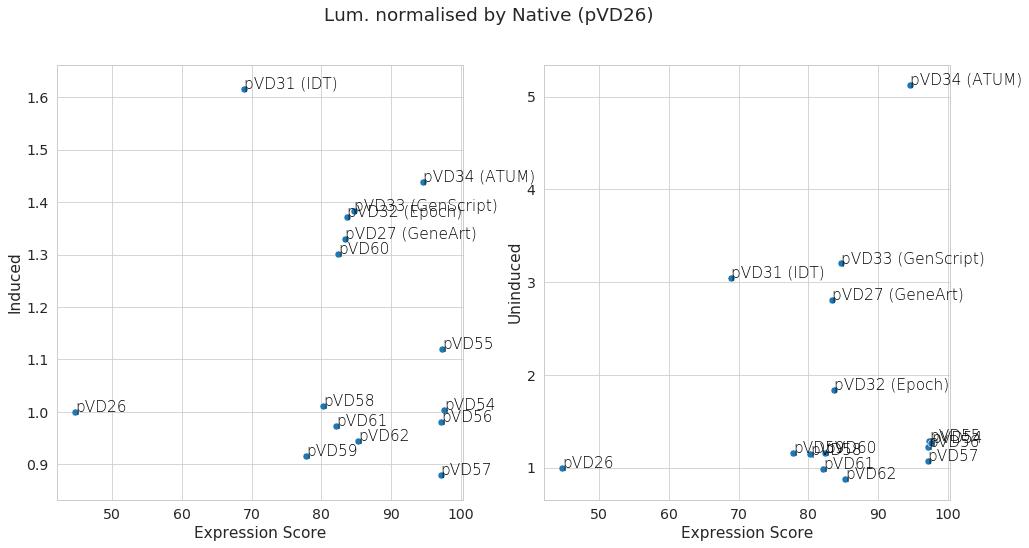

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes = ax.flatten()

for i, v in enumerate(['Induced', 'Uninduced']):
    
    scatter_text(x='Expression Score', y=v, text_column='Full name',\
                title='Lum. normalised by Native (pVD26)', data=plot_df, ax=axes[i]);
    
# plt.savefig('luciferase_normalised_native.pdf', bbox_inches='tight', pad_inches=0);

In [15]:
all_const

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27,pVD31,pVD32,pVD33,pVD34,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.319195,1.098300,1.266945,1.062932,1.421322,1.144288,1.330004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.138151,1.410412,1.396115,1.362704,1.392541,1.226107,0.941259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,0.975576,0.873563,0.864792,0.949383,1.157084,0.863292,0.743692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.195095,0.815433,0.798410,0.689551,0.673536,0.895285,0.883862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,1.065889,0.970837,0.901226,NaN,1.327179,0.912367,0.757938,1.123929,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.540843,1.438521,1.233018,NaN,1.405847,0.833190,0.808255,1.486672,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927108,1.252990,1.395189,1.158738,1.293405,1.318064,0.797020
Uninduced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.301761,2.672061,2.779787,1.624147,2.668571,3.896399,1.106140
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938134,1.361670,1.523762,1.543021,1.370593,1.462770,0.894699


In [33]:
all_const.columns = plot_df['Full name']
all_const

Full name,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27 (GeneArt),pVD31 (IDT),pVD32 (Epoch),pVD33 (GenScript),pVD34 (ATUM),pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.319195,1.098300,1.266945,1.062932,1.421322,1.144288,1.330004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.138151,1.410412,1.396115,1.362704,1.392541,1.226107,0.941259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,0.975576,0.873563,0.864792,0.949383,1.157084,0.863292,0.743692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.195095,0.815433,0.798410,0.689551,0.673536,0.895285,0.883862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,1.065889,0.970837,0.901226,NaN,1.327179,0.912367,0.757938,1.123929,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.540843,1.438521,1.233018,NaN,1.405847,0.833190,0.808255,1.486672,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927108,1.252990,1.395189,1.158738,1.293405,1.318064,0.797020
Uninduced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.301761,2.672061,2.779787,1.624147,2.668571,3.896399,1.106140
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938134,1.361670,1.523762,1.543021,1.370593,1.462770,0.894699


In [17]:
all_const.reset_index().melt('Time')

,Time,Full name,value
0,Induced,pVD26,1.000000
1,Uninduced,pVD26,1.000000
2,Induced,pVD26,1.000000
3,Uninduced,pVD26,1.000000
4,Induced,pVD26,1.000000
...,...,...,...
175,Uninduced,pVD57,1.106140
176,Induced,pVD57,0.894699
177,Uninduced,pVD57,0.956584
178,Induced,pVD57,0.946579


In [18]:
new_df = all_const.reset_index().melt('Time')
# new_df = new_df.rename(columns={'Full name':'pVD'})
# new_df = new_df.merge(index, on='pVD')
# new_df['pVD'] = new_df['pVD'].apply(lambda x: 'Native' if x=='pVD26' else x)
new_df

,Time,Full name,value
0,Induced,pVD26,1.000000
1,Uninduced,pVD26,1.000000
2,Induced,pVD26,1.000000
3,Uninduced,pVD26,1.000000
4,Induced,pVD26,1.000000
...,...,...,...
175,Uninduced,pVD57,1.106140
176,Induced,pVD57,0.894699
177,Uninduced,pVD57,0.956584
178,Induced,pVD57,0.946579


In [19]:
index_dict = {}
for i in index.pVD:
    v = index[index.pVD == i].copy()
    if v.Type.values[0] == 'Optimised':
        ty = 'TIsigner'
    if v.Type.values[0] == 'Native':
        ty = 'Native'
    if str(v.Company.values[0]) != 'nan':
        ty = v.Company.values[0]
    try:
        index_dict[i] = ty + ' (' + str(v['Opening Energy'].round(2).values[0]) + ')'
    except Exception:
        print(str(v['Opening Energy'].round(2).values[0]) )


In [20]:
new_df = all_const.reset_index().melt('Time')
new_df['Full name'] = new_df['Full name'].apply(lambda x: x.split(' (')[0])
new_df['Full name'] = new_df['Full name'].apply(lambda x: index_dict[x])

In [21]:
Induced = new_df[new_df.Time == 'Induced']
Induced = pd.merge(Induced,Induced.groupby('Full name').mean().reset_index(), on='Full name')
Induced.columns = ['Time','Full name','value','mean']

In [22]:
Uninduced = new_df[new_df.Time == 'Uninduced']
Uninduced = pd.merge(Uninduced,Uninduced.groupby('Full name').mean().reset_index(), on='Full name')
Uninduced.columns = ['Time','Full name','value','mean']

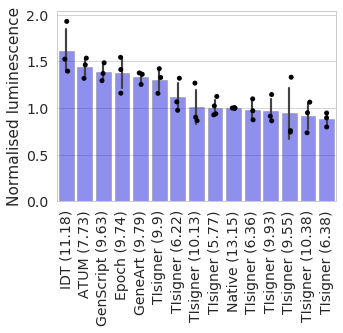

In [106]:
# plot_df # Final mean
# plot_df[plot_df.columns[:3]].set_index('pVD').plot(kind='bar')

plt.figure(figsize=(5, 3.5))
# g1 = sns.pointplot(data=all_const.reset_index().melt('Time'), x='variable', y='value', hue='Time',\
#                   capsize=.2, linestyles=["", ""], plot_kws=dict(alpha=0.3), ci="sd", dodge=0.4)
# plt.setp(g1.collections, alpha=0)
plt.xticks(rotation=90);

g2 = sns.stripplot(data=Induced[Induced['Time'] == 'Induced'].sort_values('mean', ascending=False), x='Full name', y='value', color='black')

g3 = sns.barplot(data=Induced[Induced['Time'] == 'Induced'].sort_values('mean', ascending=False), x='Full name', y='value', ci='sd', alpha=0.5, color='blue', 
                 edgecolor=".5")
g3.set_xlabel('');
g3.set_ylabel('Normalised luminescence');
plt.savefig('luciferase_Induced.pdf', bbox_inches='tight', pad_inches=0);

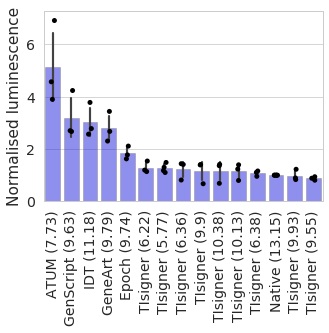

In [107]:
# import matplotlib as mpl

# pts = np.linspace(0, np.pi * 2, 24)
# circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
# vert = np.r_[circ, circ[::-1] * .7]
# open_circle = mpl.path.Path(vert)

plt.figure(figsize=(5, 3.5))
plt.xticks(rotation=90);

g2 = sns.stripplot(data=Uninduced[Uninduced['Time'] == 'Uninduced'].sort_values('mean', ascending=False), \
                   x='Full name', y='value', color='black') #, marker="$\circ$", size=10) #marker=open_circle)

g3 = sns.barplot(data=Uninduced[Uninduced['Time'] == 'Uninduced'].sort_values('mean', ascending=False), x='Full name', y='value', ci='sd', alpha=0.5, color='blue', 
                 edgecolor=".5")
g3.set_xlabel('');
g3.set_ylabel('Normalised luminescence');
plt.savefig('luciferase_Uninduced.pdf', bbox_inches='tight', pad_inches=0);

In [23]:
# !pip install pingouin --user
index[index.pVD == 'pVD54']['Expression Score'][0]

97.63

In [24]:
def exp_sc(x):
    if '(' in x:
        x = x.split(' (')[0]
#         print(x)|
    return index[index.pVD == x]['Expression Score'].values[0]

In [25]:
Induced['Expression Score'] = Induced['Full name'].apply(exp_sc)
Uninduced['Expression Score'] = Uninduced['Full name'].apply(exp_sc)

In [26]:
plot_df['Expression Score'] = plot_df['pVD'].apply(exp_sc)

In [27]:
Induced = Induced[~Induced['value'].isna()]

In [30]:
# !pip install pingouin --user

In [31]:
import pingouin as pg

Induced_ttest = pg.pairwise_ttests(data=Induced, dv='value', between='Full name', parametric=False)

In [32]:
Induced_ttest[Induced_ttest['p-unc'] < 0.05]

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
4,Full name,pVD26 (Native),pVD60,False,False,0.0,two-sided,0.009116,-3.748210
7,Full name,pVD26 (Native),pVD27 (GeneArt),False,False,0.0,two-sided,0.009116,-8.158084
8,Full name,pVD26 (Native),pVD31 (IDT),False,False,0.0,two-sided,0.009116,-3.682270
9,Full name,pVD26 (Native),pVD32 (Epoch),False,False,0.0,two-sided,0.009116,-3.161312
10,Full name,pVD26 (Native),pVD33 (GenScript),False,False,0.0,two-sided,0.009116,-6.616161
11,Full name,pVD26 (Native),pVD34 (ATUM),False,False,0.0,two-sided,0.009116,-6.607288
13,Full name,pVD26 (Native),pVD57,False,False,18.0,two-sided,0.009116,2.640243


In [33]:
from scipy import stats
stats.ttest_ind(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                Induced[Induced['Full name']=='pVD60'].value, equal_var=False)

Ttest_indResult(statistic=-3.9039387502126695, pvalue=0.05978955359713323)

In [34]:
stats.ttest_ind(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                Induced[Induced['Full name']=='pVD31 (IDT)'].value, equal_var=False)

Ttest_indResult(statistic=-3.835259445118568, pvalue=0.061753993881602395)

In [35]:
stats.ttest_ind(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                Induced[Induced['Full name']=='pVD34 (ATUM)'].value, equal_var=False)

Ttest_indResult(statistic=-6.881805345161023, pvalue=0.020469121724435352)

In [36]:
stats.mannwhitneyu(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                Induced[Induced['Full name']=='pVD60'].value, alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=0.004557893626254153)

In [37]:
stats.mannwhitneyu(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                Induced[Induced['Full name']=='pVD31 (IDT)'].value, alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=0.004557893626254153)

In [38]:
stats.mannwhitneyu(Induced[Induced['Full name']=='pVD26 (Native)'].value,
                [2340000,870006,1000], alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=0.004557893626254153)

In [39]:
plot_df[plot_df.columns[:3]]

,pVD,Induced,Uninduced
0,pVD26,1.000000,1.000000
1,pVD55,1.120220,1.291363
2,pVD56,0.980900,1.221455
3,pVD58,1.010988,1.142514
4,pVD59,0.915738,1.155231
5,pVD60,1.301861,1.157308
6,pVD61,0.973315,0.984861
7,pVD62,0.943878,0.877792
8,pVD27,1.330277,2.803849
9,pVD31,1.615649,3.041509


In [40]:
plot_df[plot_df.columns[:3]].round(2).to_json(orient='records')

'[{"pVD":"pVD26","Induced":1.0,"Uninduced":1.0},{"pVD":"pVD55","Induced":1.12,"Uninduced":1.29},{"pVD":"pVD56","Induced":0.98,"Uninduced":1.22},{"pVD":"pVD58","Induced":1.01,"Uninduced":1.14},{"pVD":"pVD59","Induced":0.92,"Uninduced":1.16},{"pVD":"pVD60","Induced":1.3,"Uninduced":1.16},{"pVD":"pVD61","Induced":0.97,"Uninduced":0.98},{"pVD":"pVD62","Induced":0.94,"Uninduced":0.88},{"pVD":"pVD27","Induced":1.33,"Uninduced":2.8},{"pVD":"pVD31","Induced":1.62,"Uninduced":3.04},{"pVD":"pVD32","Induced":1.37,"Uninduced":1.84},{"pVD":"pVD33","Induced":1.38,"Uninduced":3.2},{"pVD":"pVD34","Induced":1.44,"Uninduced":5.12},{"pVD":"pVD54","Induced":1.0,"Uninduced":1.27},{"pVD":"pVD57","Induced":0.88,"Uninduced":1.07}]'

#### For website

In [24]:
## Sequences
index[['First 30 nt', 'Opening Energy', 'Expression Score', 'Type', 'Company', 'Full Sequence']].to_json(orient='records')

'[{"First 30 nt":"ATGACATCAAAAGTATACGACCCAGAGCAG","Opening Energy":5.77,"Expression Score":97.63,"Type":"Optimised","Company":null,"Full Sequence":"ATGACATCAAAAGTATACGACCCAGAGCAGAGGAAACGGATGATAACTGGTCCGCAGTGGTGGGCCAGATGTAAACAAATGAATGTTCTTGATTCATTTATTAATTATTATGATTCAGAAAAACATGCAGAAAATGCTGTTATTTTTTTACATGGTAACGCGGCCTCTTCTTATTTATGGCGACATGTTGTGCCACATATTGAGCCAGTAGCGCGGTGTATTATACCAGATCTTATTGGTATGGGCAAATCAGGCAAATCTGGTAATGGTTCTTATAGGTTACTTGATCATTACAAATATCTTACTGCATGGTTTGAACTTCTTAATTTACCAAAGAAGATCATTTTTGTCGGCCATGATTGGGGTGCTTGTTTGGCATTTCATTATAGCTATGAGCATCAAGATAAGATCAAAGCAATAGTTCACGCTGAAAGTGTAGTAGATGTGATTGAATCATGGGATGAATGGCCTGATATTGAAGAAGATATTGCGTTGATCAAATCTGAAGAAGGAGAAAAAATGGTTTTGGAGAATAACTTCTTCGTGGAAACCATGTTGCCATCAAAAATCATGAGAAAGTTAGAACCAGAAGAATTTGCAGCATATCTTGAACCATTCAAAGAGAAAGGTGAAGTTCGTCGTCCAACATTATCATGGCCTCGTGAAATCCCGTTAGTAAAAGGTGGTAAACCTGACGTTGTACAAATTGTTAGGAATTATAATGCTTATCTACGTGCAAGTGATGATTTACCAAAAATGTTTATTGAATCGGATCCAGGATTCTTTTCCAATGCTATTGTTGAAGGCGCCAAGAAGTTTCCTAATACTGAATTTGTCAAAGTAAAAGGTCTT

In [25]:
def getVal(pvd, df, Type):
    try:
        return df[pvd][Type]
    except Exception:
        pass

In [34]:
fl_df = pd.DataFrame(columns=['Induced', 'Uninduced'], index=index.pVD)

for _, v in enumerate(index.pVD):
    fl_df.loc[v]['Induced'] = np.round([ q for q in [getVal(v, i, 'Induced') for i in normalised] if q != None], 2)
    fl_df.loc[v]['Uninduced'] = np.round([q for q in [getVal(v, i, 'Uninduced') for i in normalised] if q!= None], 2)
fl_df

,Induced,Uninduced
pVD,,
pVD54,"[1.12, 0.93, 0.94, 1.02]","[1.49, 1.3, 1.1, 1.18]"
pVD55,"[1.32, 0.98, 1.07]","[1.14, 1.2, 1.54]"
pVD56,"[1.1, 0.87, 0.97]","[1.41, 0.82, 1.44]"
pVD57,"[0.8, 0.89, 0.95]","[1.11, 0.96, 1.16]"
pVD58,"[1.27, 0.86, 0.9]","[1.4, 0.8, 1.23]"
pVD59,"[1.06, 0.95, 0.73]","[1.36, 0.69, 1.41]"
pVD60,"[1.42, 1.16, 1.33]","[1.39, 0.67, 1.41]"
pVD61,"[1.14, 0.86, 0.91]","[1.23, 0.9, 0.83]"
pVD62,"[1.33, 0.74, 0.76]","[0.94, 0.88, 0.81]"


In [27]:
types = ['Induced', 'Uninduced']

In [35]:
final = final.round(2)
final

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD54,pVD27,pVD31,pVD32,pVD33,pVD34,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.12,0.98,1.01,0.92,1.30,0.97,0.94,1.00,1.33,1.62,1.37,1.38,1.44,0.88
Uninduced,1.0,1.29,1.22,1.14,1.16,1.16,0.98,0.88,1.27,2.80,3.04,1.84,3.20,5.12,1.07


In [29]:
all_dict = {}

for i, v in enumerate(index.pVD):
    new_dict = {}
    new_dict['Type'] = index.loc[i]['Type']
    new_dict['Company'] = index.loc[i]['Company']
    new_dict['First 30 nt'] = index.loc[i]['First 30 nt']
    new_dict['Opening Energy'] = index.loc[i]['Opening Energy']
    new_dict['Expression Score'] = index.loc[i]['Expression Score']
    data = {}
    for p, q in enumerate(types):
        data_dict = {}
        data_dict["Ind/Unind"] = q
        data_dict["All Luminescence"] = fl_df.loc[v][q].tolist()
        data_dict["Mean Luminescence"] = final.loc[q][v]
        data[p] = data_dict
    new_dict['Data'] = [v for k, v in data.items()]
    all_dict[i] = new_dict

In [33]:
# all_dict

In [30]:
import json 

json.dumps([v for k, v in all_dict.items()])

'[{"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACATCAAAAGTATACGACCCAGAGCAG", "Opening Energy": 5.77, "Expression Score": 97.63, "Data": [{"Ind/Unind": "Induced", "All Luminescence": [1.12, 0.93, 0.94, 1.02], "Mean Luminescence": 1.0}, {"Ind/Unind": "Uninduced", "All Luminescence": [1.49, 1.3, 1.1, 1.18], "Mean Luminescence": 1.27}]}, {"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACAAGTAAAGTTTATGACCCAGAGCAG", "Opening Energy": 6.22, "Expression Score": 97.29, "Data": [{"Ind/Unind": "Induced", "All Luminescence": [1.32, 0.98, 1.07], "Mean Luminescence": 1.12}, {"Ind/Unind": "Uninduced", "All Luminescence": [1.14, 1.2, 1.54], "Mean Luminescence": 1.29}]}, {"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACCAGCAAAGTTTATGACCCAGAGCAG", "Opening Energy": 6.36, "Expression Score": 97.15, "Data": [{"Ind/Unind": "Induced", "All Luminescence": [1.1, 0.87, 0.97], "Mean Luminescence": 0.98}, {"Ind/Unind": "Uninduced", "All Luminescence": [1.41, 0.82, 1.44], "Mean Lumi

In [42]:
### Final data

final_df = final.transpose().reset_index()
final_df.columns = [ 'pVD', 'Induced', 'Uninduced']
final_df = final_df.merge(index, on='pVD')
final_df

,pVD,Induced,Uninduced,TIsigner ID,First 30 nt,Type,Company,Full Sequence,Opening Energy,Expression Score,# Reps
0,pVD26,1.00,1.00,RLuc-001(Native),ATGACTTCGAAAGTTTATGATCCAGAACAA,Native,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,13.15,44.74,6
1,pVD55,1.12,1.29,RLuc-TI-003,ATGACAAGTAAAGTTTATGACCCAGAGCAG,Optimised,NaN,ATGACAAGTAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.22,97.29,3
2,pVD56,0.98,1.22,RLuc-TI-004,ATGACCAGCAAAGTTTATGACCCAGAGCAG,Optimised,NaN,ATGACCAGCAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.36,97.15,3
3,pVD58,1.01,1.14,RLuc-TI-006,ATGACTTCGAAAGTTTATGATCCAGAACAG,Optimised,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAGAGGAAACGGATGATAA...,10.13,80.31,3
4,pVD59,0.92,1.16,RLuc-TI-007,ATGACATCAAAAGTTTATGATCCAGAACAA,Optimised,NaN,ATGACATCAAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,10.38,77.87,3
5,pVD60,1.30,1.16,RLuc-TI-008,ATGACGTCGAAAGTTTACGATCCAGAACAA,Optimised,NaN,ATGACGTCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.90,82.37,3
6,pVD61,0.97,0.98,RLuc-TI-009,ATGACATCGAAAGTTTACGATCCAGAACAA,Optimised,NaN,ATGACATCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.93,82.11,3
7,pVD62,0.94,0.88,RLuc-TI-010,ATGACCTCGAAAGTTTATGACCCAGAACAA,Optimised,NaN,ATGACCTCGAAAGTTTATGACCCAGAACAAAGGAAACGGATGATAA...,9.55,85.25,3
8,pVD54,1.00,1.27,RLuc-TI-002,ATGACATCAAAAGTATACGACCCAGAGCAG,Optimised,NaN,ATGACATCAAAAGTATACGACCCAGAGCAGAGGAAACGGATGATAA...,5.77,97.63,4
9,pVD27,1.33,2.80,RLuc-002(GeneArt),ATGACCAGCAAAGTTTATGATCCGGAACAG,Commercial,GeneArt,ATGACCAGCAAAGTTTATGATCCGGAACAGCGTAAACGTATGATTA...,9.79,83.34,3


In [43]:
final_df.to_csv('RLuc_Results_final.csv')